# Phase 2 project:
## Movie Studio Analysis

# Business Understanding 

A company is interested in entering the movie studio industry. This is based on performances of films from studios such as Warner Bros, Sony, and Paramount Pictures.
They have no background/knowledge on the film industry, but are excited to try it out. They would like an analysis on the movies that have been performing well to make a data-driven decision. 

**Key focus points:**
1. Which genre of movies are performing well in the Box Office
2. How much revenue are they making
3. The ratings of the movies and their respective budget 
4. The runtime of the movies that are performing well

The focus points are to guide the company into ensuring the films produced and released are performing well (ratings) at the Box Office, are a good investment (ROI) and they work well with the given budget. 

**Datasets used:**
- IMDB dataset
- bom.movie_gross dataset
- 


**Outcome:**
- 3 recommendations for the potential new movie studio. This helps guide the company to draw an appropriate and data-driven decision. 


# Data Understanding 

In this section, we'll be going through the datasets and choosing the most appropriate for this analysis/project.

In [1]:
#importing the necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

The provided datasets are:
- bom.movie_gross
- imdb
- rt.movie_info
- rt.reviews
- tmdb.movies
- tn.movies_budgets

In [2]:
movie_gross = pd.read_csv("C:/Users/PC/Desktop/School work/Projects/Phase 2/Phase-2-Movie-Project/data/bom.movie_gross.csv.gz")
movie_gross.head(2)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010


In [3]:
rotten_tomatoes = pd.read_csv("C:/Users/PC/Desktop/School work/Projects/Phase 2/Phase-2-Movie-Project/data/rt.movie_info.tsv.gz", sep = '\t')
rotten_tomatoes.head(2)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One


In [4]:
reviews = pd.read_csv("C:/Users/PC/Desktop/School work/Projects/Phase 2/Phase-2-Movie-Project/data/rt.reviews.tsv.gz", sep = '\t', encoding='cp1252')
reviews.head(2)

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"


In [5]:
tmdb = pd.read_csv("C:/Users/PC/Desktop/School work/Projects/Phase 2/Phase-2-Movie-Project/data/tmdb.movies.csv.gz")
tmdb.head(2)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610


In [6]:
movie_budgets = pd.read_csv("C:/Users/PC/Desktop/School work/Projects/Phase 2/Phase-2-Movie-Project/data/tn.movie_budgets.csv.gz")
movie_budgets.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


In [7]:
imdb = 'C:/Users/PC/Desktop/School work/Projects/Phase 2/Phase-2-Movie-Project/data/im.db'

# Opening up a connection
conn = sqlite3.connect(imdb)

In [8]:
table_name = """
SELECT name 
AS 'Table Names' 
FROM sqlite_master 
WHERE type='table';"""

pd.read_sql(table_name, conn)

,Table Names
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [9]:
query_one= """
SELECT *
FROM movie_basics
LIMIT 2;
"""
pd.read_sql(query_one, conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"


In [10]:
query_two= """
SELECT *
FROM movie_ratings
LIMIT 2;
"""
pd.read_sql(query_two, conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559


In [11]:
conn.close()

#### From viewing the data above and getting a glimpse of their columns and data in the dataset. The choices are the compulsory IMDb SQLite dataset, bom.movie_gross, and the optional tn. movie_budgets datasets.

# Data Cleaning 

### Box Office Mojo Dataset

In [12]:
movie_gross.head(2)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010


In [13]:
# from looking at the first 2 rows of the dataset. We need to remove the year eg 2010 in Alce in Wonderland. And then for ease in merging,
# have all the letters of the title in small/lowercase 

movie_gross['title_new'] = movie_gross['title'].str.lower().str.strip()
movie_gross.head(2)

,title,studio,domestic_gross,foreign_gross,year,title_new
0,Toy Story 3,BV,415000000.0,652000000,2010,toy story 3
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,alice in wonderland (2010)


In [14]:
movie_gross.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year',
       'title_new'],
      dtype='object')

In [15]:
# we drop the 'title' column as its not needed

movie_gross = movie_gross.drop('title', axis=1) 
movie_gross.head()

,studio,domestic_gross,foreign_gross,year,title_new
0,BV,415000000.0,652000000,2010,toy story 3
1,BV,334200000.0,691300000,2010,alice in wonderland (2010)
2,WB,296000000.0,664300000,2010,harry potter and the deathly hallows part 1
3,WB,292600000.0,535700000,2010,inception
4,P/DW,238700000.0,513900000,2010,shrek forever after


In [16]:
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          3382 non-null   object 
 1   domestic_gross  3359 non-null   float64
 2   foreign_gross   2037 non-null   object 
 3   year            3387 non-null   int64  
 4   title_new       3387 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [17]:
# Convert the foreign gross column to numeric 

movie_gross['foreign_gross'] = pd.to_numeric(movie_gross['foreign_gross'], errors ='coerce')
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          3382 non-null   object 
 1   domestic_gross  3359 non-null   float64
 2   foreign_gross   2032 non-null   float64
 3   year            3387 non-null   int64  
 4   title_new       3387 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [18]:
movie_gross.duplicated().value_counts()

False    3387
Name: count, dtype: int64

In [19]:
movie_gross.shape

(3387, 5)

In [20]:
# checking for columns with missing values 
movie_gross.isna().sum().sort_values(ascending = True)

year                 0
title_new            0
studio               5
domestic_gross      28
foreign_gross     1355
dtype: int64

In [21]:
# dropping the few rows in the domestic gross and studio columns

movie_gross = movie_gross.dropna(subset = ['studio', 'domestic_gross'])

# filling the foreign gross column with 0. This is because through research, the column is needed to calculate the worldwide gross
# cannot assume it to be mean due to false numbers. Foreign gross is due to the movies not being launched in other countries, or not being calculated/
# tabulated clealry or lost due to currency difference. 

movie_gross['foreign_gross'] = movie_gross['foreign_gross'].fillna(0)

movie_gross.isna().sum().sort_values(ascending = True)

studio            0
domestic_gross    0
foreign_gross     0
year              0
title_new         0
dtype: int64

### The Numbers Dataset

In [22]:
movie_budgets.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


In [23]:
movie_budgets.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [24]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [25]:
movie_budgets.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [26]:
movie_budgets.shape

(5782, 6)

In [27]:
#Checking for duplicates in the numbers dataset 

movie_budgets.duplicated().value_counts()

False    5782
Name: count, dtype: int64

The Numbers dataset is quite clean but we need to extract the year from the release date in order to merge the datasets well. As well as the colums need to be converted. 

In [28]:
# create a list with the columns in it

columns = ['production_budget', 'domestic_gross','worldwide_gross']
columns

['production_budget', 'domestic_gross', 'worldwide_gross']

In [29]:
# remove the dollar and commas in the 'production_budget', 'domestic_gross','worldwide_gross' columns before converting to numerical

for col in columns:
    movie_budgets[col] = movie_budgets[col].str.replace(r'[\$,]', '', regex=True)

movie_budgets.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875


In [30]:
# converting the 'production_budget', 'domestic_gross','worldwide_gross' columns into numerical values 

for col in columns:
    movie_budgets[col] = pd.to_numeric(movie_budgets[col])

movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


In [31]:
# get the year on its own eg 2010 from the release_date column 

# Converting the release_date to datetime
movie_budgets['release_date'] = pd.to_datetime(movie_budgets['release_date'])

# Creating a new column called year and extracting the year from the column of release_date
movie_budgets['year'] = movie_budgets['release_date'].dt.year
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017


In [32]:
# converting the movie title to lowercase letters to match the other datasets

movie_budgets['title_new'] = movie_budgets['movie'].str.lower().str.strip()

# Dropping the extra movie column 

movie_budgets = movie_budgets.drop('movie', axis = 1) 
movie_budgets.head(2)

,id,release_date,production_budget,domestic_gross,worldwide_gross,year,title_new
0,1,2009-12-18,425000000,760507625,2776345279,2009,avatar
1,2,2011-05-20,410600000,241063875,1045663875,2011,pirates of the caribbean: on stranger tides


In [33]:
# dropping the release date column as we have extracted year 

movie_budgets = movie_budgets.drop('release_date', axis = 1)
movie_budgets.head(2)

,id,production_budget,domestic_gross,worldwide_gross,year,title_new
0,1,425000000,760507625,2776345279,2009,avatar
1,2,410600000,241063875,1045663875,2011,pirates of the caribbean: on stranger tides


### IMDB Dataset

In [34]:
imdb = 'C:/Users/PC/Desktop/School work/Projects/Phase 2/Phase-2-Movie-Project/data/im.db'

# Opening up a connection
conn = sqlite3.connect(imdb)

In [35]:
# when looking at the datasets to use, the 2 tables that suit best are movie_rating and movie_basics

query_one= """
SELECT *
FROM movie_basics;
"""
pd.read_sql(query_one, conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [36]:
query_two= """
SELECT *
FROM movie_ratings;
"""
pd.read_sql(query_two, conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [37]:
# joining the 2 tables using the movie_id column 

imdb_q = """
SELECT *
FROM movie_basics 
JOIN "movie_ratings"
ON movie_basics.movie_id = "movie_ratings".movie_id;
"""
imdb = pd.read_sql(imdb_q, conn)

In [38]:
conn.close()

In [39]:
imdb.head(2)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,7.2,43


In [40]:
imdb.columns

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'movie_id', 'averagerating', 'numvotes'],
      dtype='object')

In [41]:
# In order to drop the duplicate column movie_id, we rename the columns first.

imdb.columns = ['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'movie_id_x', 'averagerating', 'numvotes']
imdb.columns

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'movie_id_x', 'averagerating', 'numvotes'],
      dtype='object')

In [42]:
# drop the unrequired columns; 2nd movie_id, original_title

imdb = imdb.drop(['movie_id_x', 'original_title'], axis = 1)
imdb.head(2)

,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43


In [43]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   start_year       73856 non-null  int64  
 3   runtime_minutes  66236 non-null  float64
 4   genres           73052 non-null  object 
 5   averagerating    73856 non-null  float64
 6   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 3.9+ MB


In [44]:
imdb.duplicated().value_counts()

False    73856
Name: count, dtype: int64

In [45]:
imdb.shape

(73856, 7)

In [46]:
imdb.isna().sum().sort_values(ascending = True)

movie_id              0
primary_title         0
start_year            0
averagerating         0
numvotes              0
genres              804
runtime_minutes    7620
dtype: int64

In [47]:
# The runtime_minutes column has too many missing values therefore needs to be dropped 
# Fill the missing genre with unknown because it's an object and also cannot make an assumption

# Dropping the column
imdb = imdb.drop(['runtime_minutes'], axis = 1)

# Filling the column with unknown
imdb['genres'] = imdb['genres'].fillna('Unknown')

imdb.isna().sum().sort_values(ascending = True)

movie_id         0
primary_title    0
start_year       0
genres           0
averagerating    0
numvotes         0
dtype: int64

In [48]:
# The start_year needs to be renamed to year and the primary_title to title_new to match the other datasets

# First change the primary title column to lowercase and drop the column as well
imdb['title_new'] = imdb['primary_title'].str.lower().str.strip()
# dropping
imdb = imdb.drop(['primary_title'], axis = 1)

imdb.head(2)

,movie_id,start_year,genres,averagerating,numvotes,title_new
0,tt0063540,2013,"Action,Crime,Drama",7.0,77,sunghursh
1,tt0066787,2019,"Biography,Drama",7.2,43,one day before the rainy season


In [49]:
# rename start_year to year 

imdb = imdb.rename(columns={'start_year': 'year'})
imdb.head(2)

,movie_id,year,genres,averagerating,numvotes,title_new
0,tt0063540,2013,"Action,Crime,Drama",7.0,77,sunghursh
1,tt0066787,2019,"Biography,Drama",7.2,43,one day before the rainy season


### Checking for outliers in the 3 datasets 

- This is to conclude in the cleaning of the 3 datasets chosen
- Saving them as csvs for merging
- EDA after 

In [50]:
movie_gross[['domestic_gross', 'foreign_gross']].describe()

,domestic_gross,foreign_gross
count,3.356000e+03,3.356000e+03
mean,2.877149e+07,4.532518e+07
std,6.700694e+07,1.131263e+08
min,1.000000e+02,0.000000e+00
25%,1.200000e+05,0.000000e+00
50%,1.400000e+06,1.400000e+06
75%,2.795000e+07,2.970000e+07
max,9.367000e+08,9.605000e+08


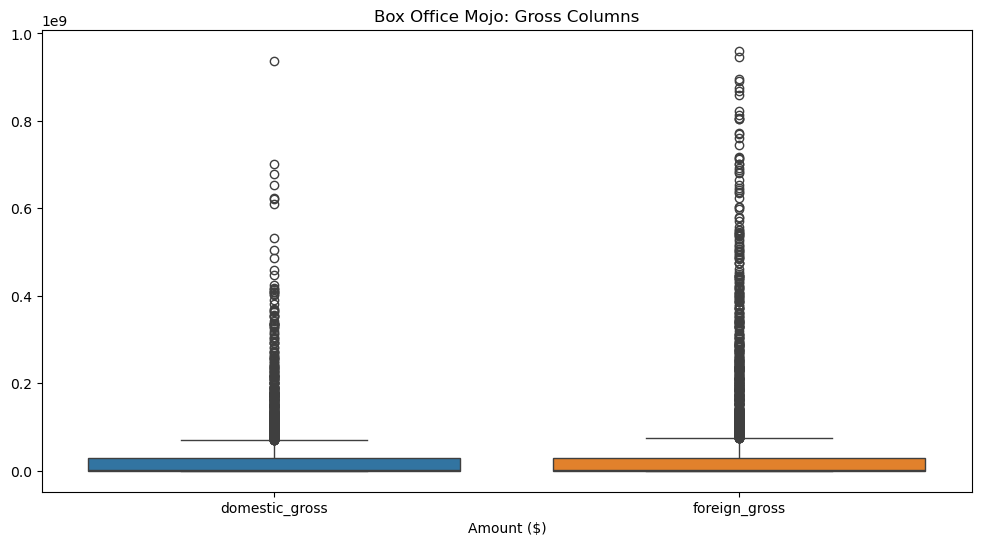

In [51]:
plt.figure(figsize = (12, 6))
sns.boxplot(data = movie_gross[['domestic_gross', 'foreign_gross']])
plt.title("Box Office Mojo: Gross Columns")
plt.xlabel("Amount ($)")
plt.show()

In [52]:
movie_budgets[['production_budget', 'domestic_gross', 'worldwide_gross']].describe()

,production_budget,domestic_gross,worldwide_gross
count,5.782000e+03,5.782000e+03,5.782000e+03
mean,3.158776e+07,4.187333e+07,9.148746e+07
std,4.181208e+07,6.824060e+07,1.747200e+08
min,1.100000e+03,0.000000e+00,0.000000e+00
25%,5.000000e+06,1.429534e+06,4.125415e+06
50%,1.700000e+07,1.722594e+07,2.798445e+07
75%,4.000000e+07,5.234866e+07,9.764584e+07
max,4.250000e+08,9.366622e+08,2.776345e+09


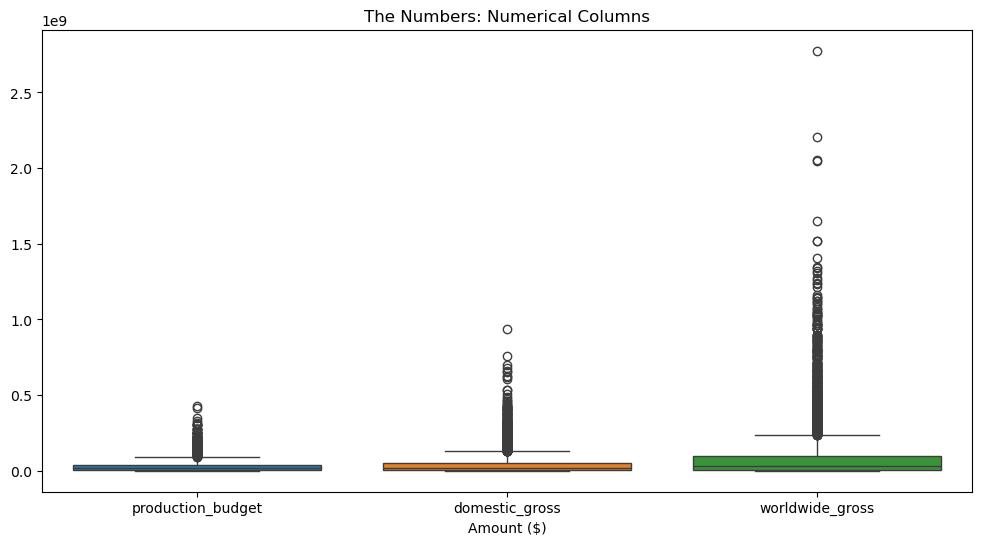

In [53]:
plt.figure(figsize = (12, 6))
sns.boxplot(data = movie_budgets[['production_budget', 'domestic_gross', 'worldwide_gross']])
plt.title("The Numbers: Numerical Columns")
plt.xlabel("Amount ($)")
plt.show()

In [54]:
imdb[['averagerating', 'numvotes']].describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


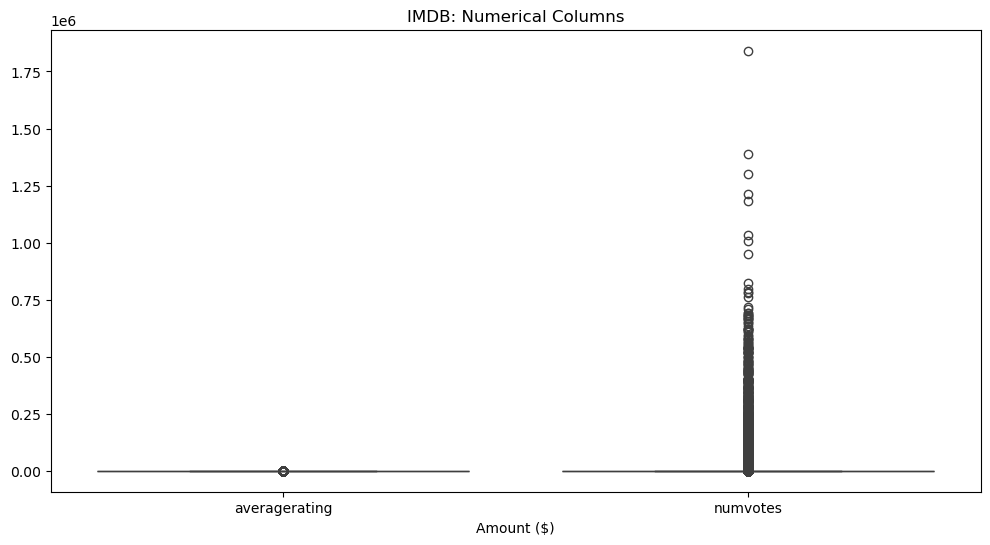

In [55]:
plt.figure(figsize = (12, 6))
sns.boxplot(data = imdb[['averagerating', 'numvotes']])
plt.title("IMDB: Numerical Columns")
plt.xlabel("Amount ($)")
plt.show()

For the case of the data provided for movie analysis, it does not make sense to handle the major outliers in the respective datasets chosen. This is because:

- For the Box Office Mojo dataset and The Numbers datasets, their .describe() shows that there are outliers in the gross columns. However, there are no negative/impossible values present. Therefore, we do not remove the outliers, as they represent moments when a movie has performed exceptionally well (blockbusters) or had low production costs (small feature films, potentially).

- For the IMDB dataset, the average rating column is okay, as there are no negatives and results fall between the given 1-10 rating options. The number of votes column has outliers as it depends on the populairty of a film and how many people went ahead and rated the films. There are instances when not many people will rate a film due to the locations it's released in, or the popularity and availability.

This means that the outliers have been retained for a realistic and true analysis of the movie industry. Based on performance, popularity/audience engagement. 

## Saving and Merging Datasets

In [56]:
# saving the 3 datasets as CSVs for merging 

movie_gross.to_csv("C:/Users/PC/Desktop/School work/Projects/Phase 2/Phase-2-Movie-Project/data/box_office_mojo.csv", index=False)

movie_budgets.to_csv("C:/Users/PC/Desktop/School work/Projects/Phase 2/Phase-2-Movie-Project/data/the_numbers.csv", index=False)

imdb.to_csv("C:/Users/PC/Desktop/School work/Projects/Phase 2/Phase-2-Movie-Project/data/imdb.csv", index=False)

In [57]:
# Loading the clean datasets to merge 

movie_gross = pd.read_csv("C:/Users/PC/Desktop/School work/Projects/Phase 2/Phase-2-Movie-Project/data/box_office_mojo.csv")

movie_budgets = pd.read_csv("C:/Users/PC/Desktop/School work/Projects/Phase 2/Phase-2-Movie-Project/data/the_numbers.csv")

imdb = pd.read_csv("C:/Users/PC/Desktop/School work/Projects/Phase 2/Phase-2-Movie-Project/data/imdb.csv")

In [58]:
movie_gross.head()

,studio,domestic_gross,foreign_gross,year,title_new
0,BV,415000000.0,652000000.0,2010,toy story 3
1,BV,334200000.0,691300000.0,2010,alice in wonderland (2010)
2,WB,296000000.0,664300000.0,2010,harry potter and the deathly hallows part 1
3,WB,292600000.0,535700000.0,2010,inception
4,P/DW,238700000.0,513900000.0,2010,shrek forever after


In [59]:
movie_budgets.head()

,id,production_budget,domestic_gross,worldwide_gross,year,title_new
0,1,425000000,760507625,2776345279,2009,avatar
1,2,410600000,241063875,1045663875,2011,pirates of the caribbean: on stranger tides
2,3,350000000,42762350,149762350,2019,dark phoenix
3,4,330600000,459005868,1403013963,2015,avengers: age of ultron
4,5,317000000,620181382,1316721747,2017,star wars ep. viii: the last jedi


In [60]:
imdb.head()

,movie_id,year,genres,averagerating,numvotes,title_new
0,tt0063540,2013,"Action,Crime,Drama",7.0,77,sunghursh
1,tt0066787,2019,"Biography,Drama",7.2,43,one day before the rainy season
2,tt0069049,2018,Drama,6.9,4517,the other side of the wind
3,tt0069204,2018,"Comedy,Drama",6.1,13,sabse bada sukh
4,tt0100275,2017,"Comedy,Drama,Fantasy",6.5,119,the wandering soap opera


In [61]:
print(f'Box Office Mojo Columns:{movie_gross.columns}')

print(f'The Numbers:{movie_budgets.columns}')

print(f'IMDB:{imdb.columns}')

Box Office Mojo Columns:Index(['studio', 'domestic_gross', 'foreign_gross', 'year', 'title_new'], dtype='object')
The Numbers:Index(['id', 'production_budget', 'domestic_gross', 'worldwide_gross', 'year',
       'title_new'],
      dtype='object')
IMDB:Index(['movie_id', 'year', 'genres', 'averagerating', 'numvotes', 'title_new'], dtype='object')


In [62]:
# Merging the datasets 

merged = pd.merge(movie_gross, imdb, on = ['year', 'title_new'], how='inner')

merged.head(2)

,studio,domestic_gross,foreign_gross,year,title_new,movie_id,genres,averagerating,numvotes
0,BV,415000000.0,652000000.0,2010,toy story 3,tt0435761,"Adventure,Animation,Comedy",8.3,682218
1,WB,292600000.0,535700000.0,2010,inception,tt1375666,"Action,Adventure,Sci-Fi",8.8,1841066


In [63]:
# last merge 

df = pd.merge(merged, movie_budgets, on = ['year', 'title_new'], how='inner')

df.head()

,studio,domestic_gross_x,foreign_gross,year,title_new,movie_id,genres,averagerating,numvotes,id,production_budget,domestic_gross_y,worldwide_gross
0,BV,415000000.0,652000000.0,2010,toy story 3,tt0435761,"Adventure,Animation,Comedy",8.3,682218,47,200000000,415004880,1068879522
1,WB,292600000.0,535700000.0,2010,inception,tt1375666,"Action,Adventure,Sci-Fi",8.8,1841066,38,160000000,292576195,835524642
2,P/DW,238700000.0,513900000.0,2010,shrek forever after,tt0892791,"Adventure,Animation,Comedy",6.3,167532,27,165000000,238736787,756244673
3,Sum.,300500000.0,398000000.0,2010,the twilight saga: eclipse,tt1325004,"Adventure,Drama,Fantasy",5.0,211733,53,68000000,300531751,706102828
4,Par.,312400000.0,311500000.0,2010,iron man 2,tt1228705,"Action,Adventure,Sci-Fi",7.0,657690,15,170000000,312433331,621156389


From the results above, the domestic_gross in the movie_gross dataset is rounded up to the nearest 1000 whereas for the movie_budgets it's the actual figure to the last digit. For more accuracy, we can use the domestic gross for The Numbers dataset.

In [64]:
# Dropping the domestic_gross_x column 

df = df.drop('domestic_gross_x', axis = 1)
df.columns

Index(['studio', 'foreign_gross', 'year', 'title_new', 'movie_id', 'genres',
       'averagerating', 'numvotes', 'id', 'production_budget',
       'domestic_gross_y', 'worldwide_gross'],
      dtype='object')

In [65]:
# Renaming the domestic_gross_y back to domestic_gross 

df = df.rename(columns={'domestic_gross_y': 'domestic_gross'})
df.columns

Index(['studio', 'foreign_gross', 'year', 'title_new', 'movie_id', 'genres',
       'averagerating', 'numvotes', 'id', 'production_budget',
       'domestic_gross', 'worldwide_gross'],
      dtype='object')

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   studio             1094 non-null   object 
 1   foreign_gross      1094 non-null   float64
 2   year               1094 non-null   int64  
 3   title_new          1094 non-null   object 
 4   movie_id           1094 non-null   object 
 5   genres             1094 non-null   object 
 6   averagerating      1094 non-null   float64
 7   numvotes           1094 non-null   int64  
 8   id                 1094 non-null   int64  
 9   production_budget  1094 non-null   int64  
 10  domestic_gross     1094 non-null   int64  
 11  worldwide_gross    1094 non-null   int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 102.7+ KB


In [67]:
df.isna().sum().sort_values(ascending = True)

studio               0
foreign_gross        0
year                 0
title_new            0
movie_id             0
genres               0
averagerating        0
numvotes             0
id                   0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [68]:
df.duplicated().value_counts()

False    1094
Name: count, dtype: int64

In [69]:
df.shape

(1094, 12)

- Reorganzing the columns
- Droppig unneccessary columns for EDA and conclsuion analysis 
- Renaming columns as well for clarity  

In [70]:
# Dropping movie_id and id columns 

df = df.drop(['movie_id', 'id'], axis = 1)
print(df.columns)

# Renaming the domestic_gross_y back to domestic_gross 

df = df.rename(columns={'title_new': 'title', 'averagerating': 'rating', 'numvotes': 'votes'})
print(df.columns)

# Organizing the column order for ease when using Tableau

df = df[['title', 'year', 'studio', 'production_budget', 'foreign_gross','domestic_gross', 'worldwide_gross', 'genres', 'rating', 'votes']]
print(df.columns)

Index(['studio', 'foreign_gross', 'year', 'title_new', 'genres',
       'averagerating', 'numvotes', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')
Index(['studio', 'foreign_gross', 'year', 'title', 'genres', 'rating', 'votes',
       'production_budget', 'domestic_gross', 'worldwide_gross'],
      dtype='object')
Index(['title', 'year', 'studio', 'production_budget', 'foreign_gross',
       'domestic_gross', 'worldwide_gross', 'genres', 'rating', 'votes'],
      dtype='object')


The dataset merged is clean; contains no duplicates, null values and the datatypes of the columns are well allocated. 

In [71]:
# Save the dataset for Tableau

df.to_csv("C:/Users/PC/Desktop/School work/Projects/Phase 2/Phase-2-Movie-Project/data/movies_dataset.csv", index=False)

# EDA

### 1. Univariate Analysis 

In [94]:
df.genres.nunique()

186

Text(0.5, 1.0, 'Top 10 Genres')

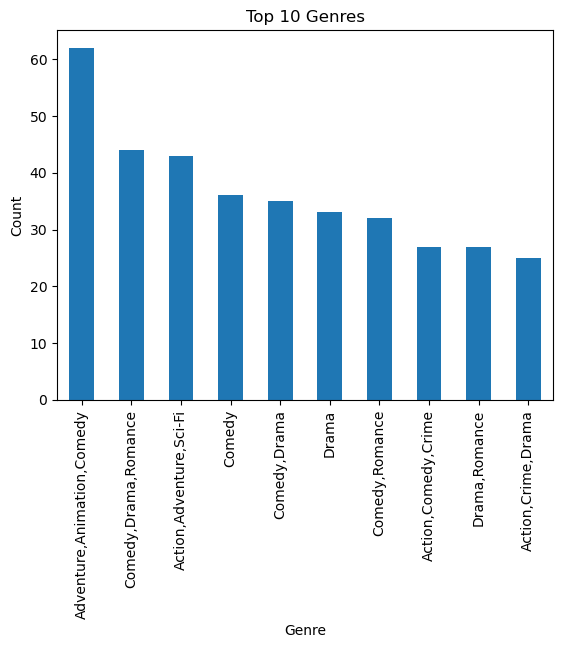

In [80]:
# Plot for the top 10 genres

df['genres'].value_counts(ascending = False).head(10).plot.bar()
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Top 10 Genres')

In the above diagram, we can see the top 10 genres out of the 186 different genres. These are the best genres to have the company try and focus on. They could potentially have good reception if they release them, because they are popular among the audience. 

In [99]:
df.studio.nunique()

78

Text(0.5, 1.0, 'Top 10 Studios')

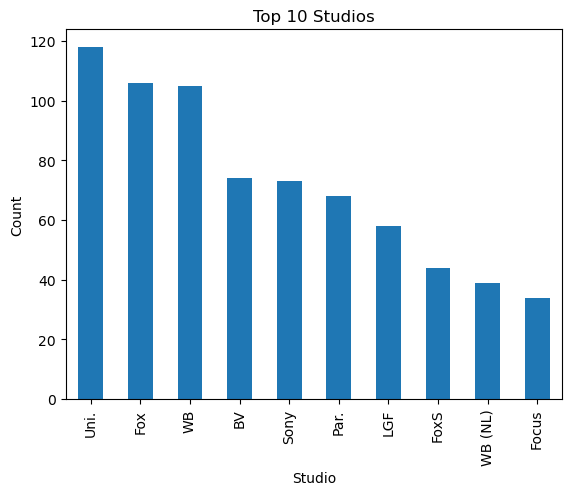

In [104]:
# Plot for the top 10 genres

df['studio'].value_counts(ascending = False).head(10).plot.bar()
plt.xlabel('Studio')
plt.ylabel('Count')
plt.title('Top 10 Studios')

The above diagram shows some of the competitors in the industry that the company would encounter. Universal Studios, Warner Bros, and Fox are famously known, with successful films/blockbusters and regular project releases.

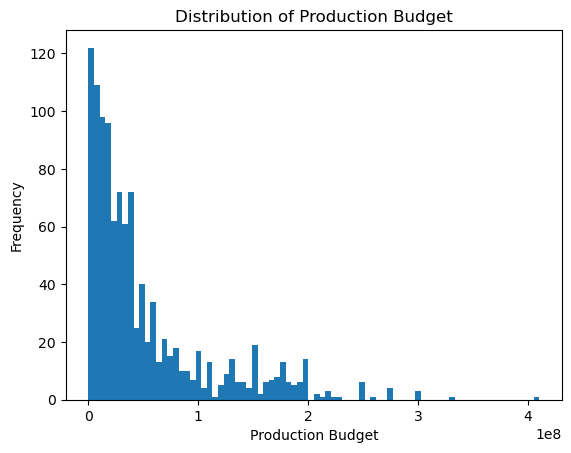

In [101]:
# Histogram for budgets for visualising the distribution 
    
plt.hist(df['production_budget'], bins = 80)
plt.xlabel("Production Budget")
plt.ylabel("Frequency")
plt.title("Distribution of Production Budget")
plt.show()

The diagram shows that the production budget tends to be on the lower end. As the budget increases, the frequency decreases as well. This means that the films tend to be mostly low-budget, and unless they are intended to be a blockbuster/high-end film, like The Avengers (according to research), they will use a high budget. 

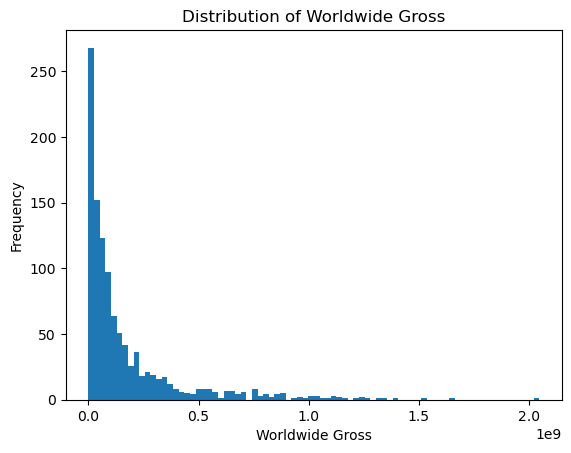

In [131]:
# Distribution for worldwide gross to understand the amount earned/returns from the films

plt.hist(df['worldwide_gross'], bins = 80)
plt.xlabel('Worldwide Gross')
plt.ylabel('Frequency')
plt.title('Distribution of Worldwide Gross')
plt.show()

The frequency of films decrease as the gross increases. Only few movies/films are grossing at above 500 million dollars. Most films gross averagely below 500 million and unless they are blockbusters/huge hit they gross at even 1 billion dollars.

### 2. Bi-variate Analysis 

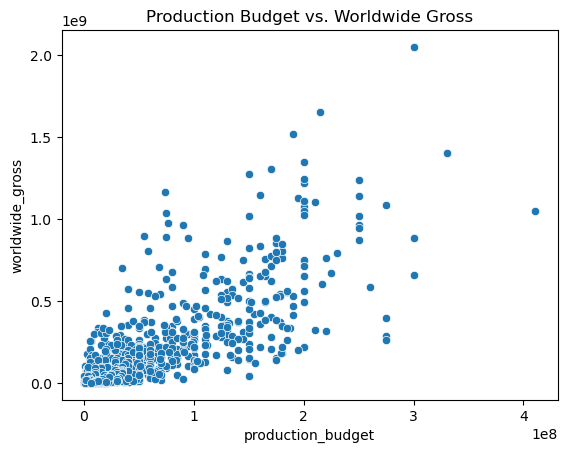

In [120]:
# Understanding the relationship between the budget put into the film and the return you get after the release (worldwide gross)

sns.scatterplot(x = 'production_budget', y = 'worldwide_gross', data = df)
plt.title('Production Budget vs. Worldwide Gross')
plt.show()

Visibly there is a relative positive relationship between the production budget and the gross. This means that the higher the budget is put into a film, it yields a higher gross. However, it is not a guarantee as well. There are moments of investing in the films with a high budget but does not perform well (yield a high gross). It can be a risk to have a high budget without the certainty of a high return.

In [132]:
# Grouping the data by studio and worldwide gross. The gross median is calculated because the worldwide gross data is skewed due to blockbuster films. 
# Therefore, using the median is a better statistical measure. Typical representation of the industry. 
# Studying the relationship between studio and worldwide gross. This will help understand which studio yields the highest gross from their releases.

studio_by_gross = df.groupby('studio')['worldwide_gross'].median().sort_values(ascending = False).head(10)
studio_by_gross

studio
P/DW        524929234.5
BV          308274568.5
GrtIndia    263502914.0
Sony        170936470.0
Fox         166785054.0
UTV         152395926.0
WB (NL)     148806510.0
MGM         139779636.0
Par.        137990372.0
WB          127990741.0
Name: worldwide_gross, dtype: float64

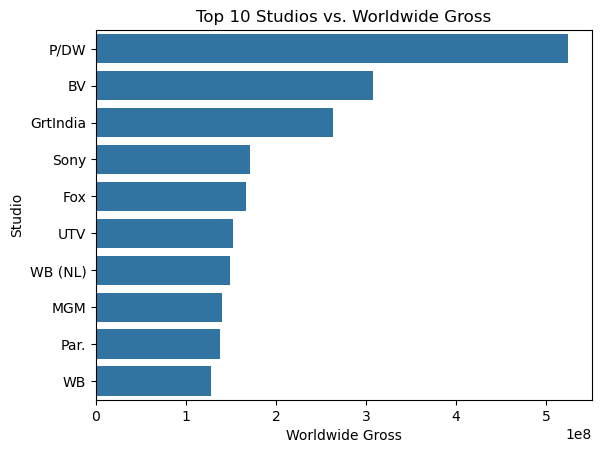

In [139]:
#plotting for visuals 

sns.barplot(x = studio_by_gross.values, y = studio_by_gross.index)
plt.title('Top 10 Studios vs. Worldwide Gross')
plt.xlabel('Worldwide Gross')
plt.ylabel('Studio')
plt.show()

P/DW(DreamWork Studios), BV(Walt Disney Studios) and GrtIndia are studios that are yielding gross above 250 million dollars from their releases which is quite high. These 10 studios show their positions in the industry and the amount they are averagely grossing at from their releases. 

These are studios the company would potentially like towrads emulating.

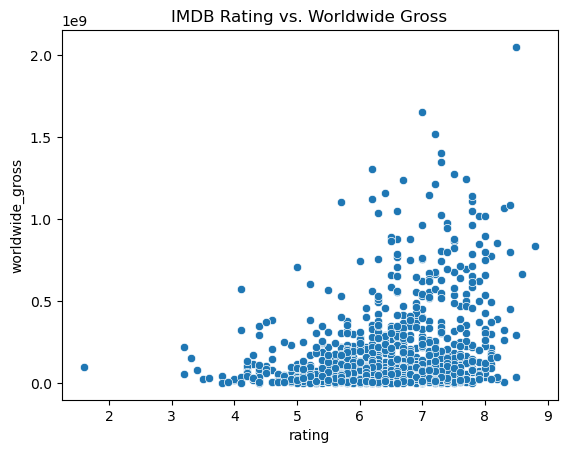

In [140]:
# Visualising and understanding the relationship between IMDB rating and the worldwide gross.

sns.scatterplot(x = 'rating', y = 'worldwide_gross', data = df)
plt.title('IMDB Rating vs. Worldwide Gross')
plt.show()

There is a visible positive relationship, however, it's not too strong as well. Highly rated movies, > 7, can gros really high such but also can gross averagely low. While a movie may be highly popular and rated, does not mean it will gross.

In [147]:
# Grouping the genres and worldwide gross. The gross median is calculated because the worldwide gross data is skewed due to blockbuster films.

genre_by_gross = df.groupby('genres')['worldwide_gross'].median().sort_values(ascending = False).head(10)
genre_by_gross

genres
Adventure,Fantasy             945577621.0
Adventure,Drama,Sci-Fi        660825409.0
Action,Adventure,Sci-Fi       621156389.0
Comedy,Mystery                586464305.0
Action,Adventure,Animation    506235067.0
Animation,Comedy,Family       469500298.0
Adventure,Drama,Fantasy       408351398.5
Adventure,Mystery,Sci-Fi      402448265.0
Action,Adventure,Fantasy      393151347.0
Biography,Drama,Musical       386665550.0
Name: worldwide_gross, dtype: float64

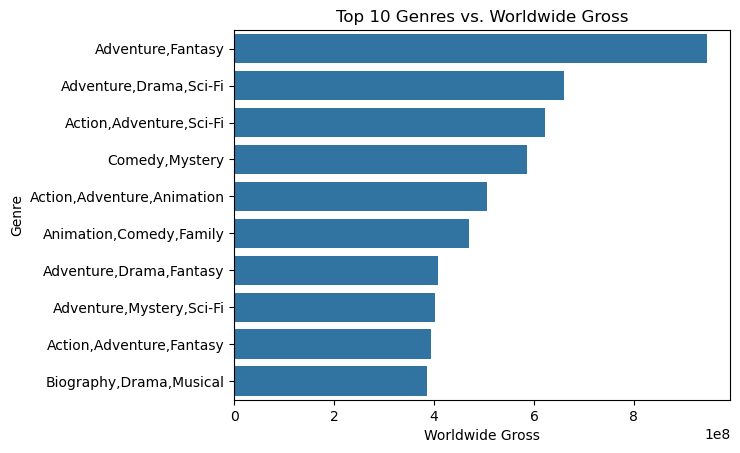

In [148]:
sns.barplot(x = genre_by_gross.values, y = genre_by_gross.index)
plt.title('Top 10 Genres vs. Worldwide Gross')
plt.xlabel('Worldwide Gross')
plt.ylabel('Genre')
plt.show()

Adventure, Fantasy yields has the highest gross. The graph shows the top earning genres. Overall, family friendly and adventure themed films work well gross wise. Guaranteed a fair return. 

### 3. Multi-variate Analysis

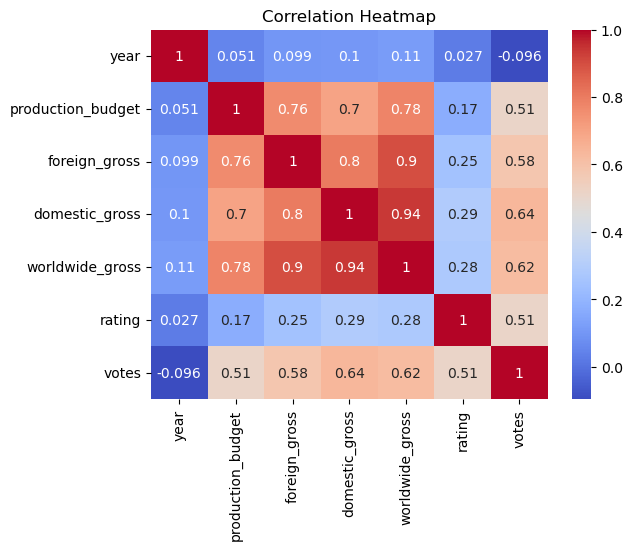

In [150]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

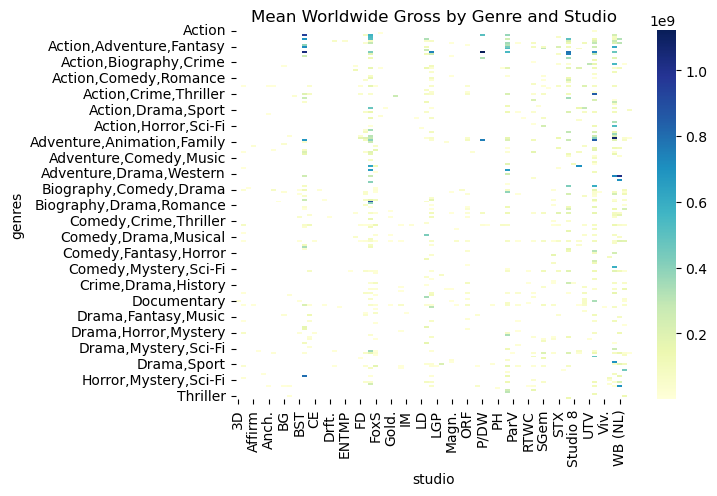

In [151]:
pivot = df.pivot_table(values='worldwide_gross', index='genres', columns='studio', aggfunc='mean')
sns.heatmap(pivot, cmap='YlGnBu')
plt.title('Mean Worldwide Gross by Genre and Studio')
plt.show()

In [154]:
top_rated = df.sort_values('rating', ascending=False).head(10)
print(top_rated[['title', 'year', 'genres', 'rating']])

                       title  year                      genres  rating
1                  inception  2010     Action,Adventure,Sci-Fi     8.8
548             interstellar  2014      Adventure,Drama,Sci-Fi     8.6
1001  avengers: infinity war  2018     Action,Adventure,Sci-Fi     8.5
804                   dangal  2016      Action,Biography,Drama     8.5
615                 whiplash  2014                 Drama,Music     8.5
913                     coco  2017  Adventure,Animation,Comedy     8.4
292    the dark knight rises  2012             Action,Thriller     8.4
302         django unchained  2012               Drama,Western     8.4
0                toy story 3  2010  Adventure,Animation,Comedy     8.3
122               inside job  2010           Crime,Documentary     8.3
